In [1]:
import pandas as pd
df = pd.read_csv("./data/diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
%conda install matplotlib

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG

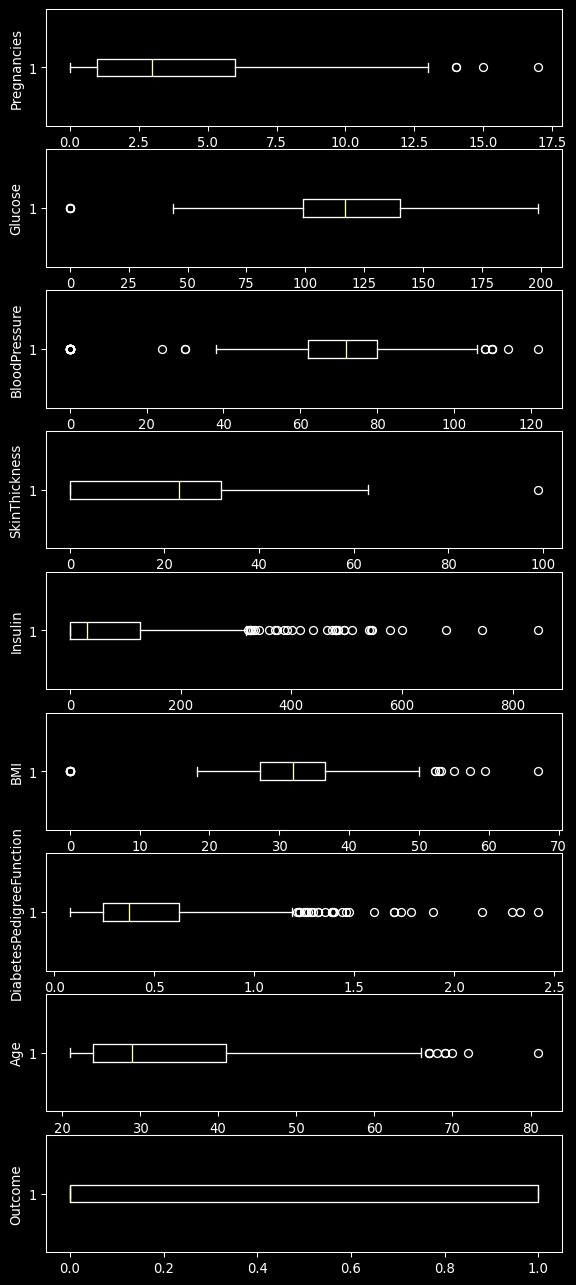

In [13]:
import matplotlib.pyplot as plt
axies = plt.subplots(9, 1, dpi=95, figsize=(7, 17))[1]
for index, column in enumerate(df.columns):
    axies[index].boxplot(df[column], vert=False)
    axies[index].set_ylabel(column)
plt.show()

In [16]:
import numpy as np


def drop_outliers(column, data=df):
    q1, q3 = np.percentile(data[column], [25, 75])
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return data[(data[column] >= lower) & (data[column] <= upper)]

In [18]:
clean_data = drop_outliers("Insulin")
clean_data = drop_outliers("Pregnancies", clean_data)
clean_data = drop_outliers("Age", clean_data)
clean_data = drop_outliers("Glucose", clean_data)
clean_data = drop_outliers("BloodPressure", clean_data)
clean_data = drop_outliers("BMI", clean_data)
clean_data = drop_outliers("DiabetesPedigreeFunction", clean_data)
clean_data = drop_outliers("SkinThickness", clean_data)
clean_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
import seaborn as sns

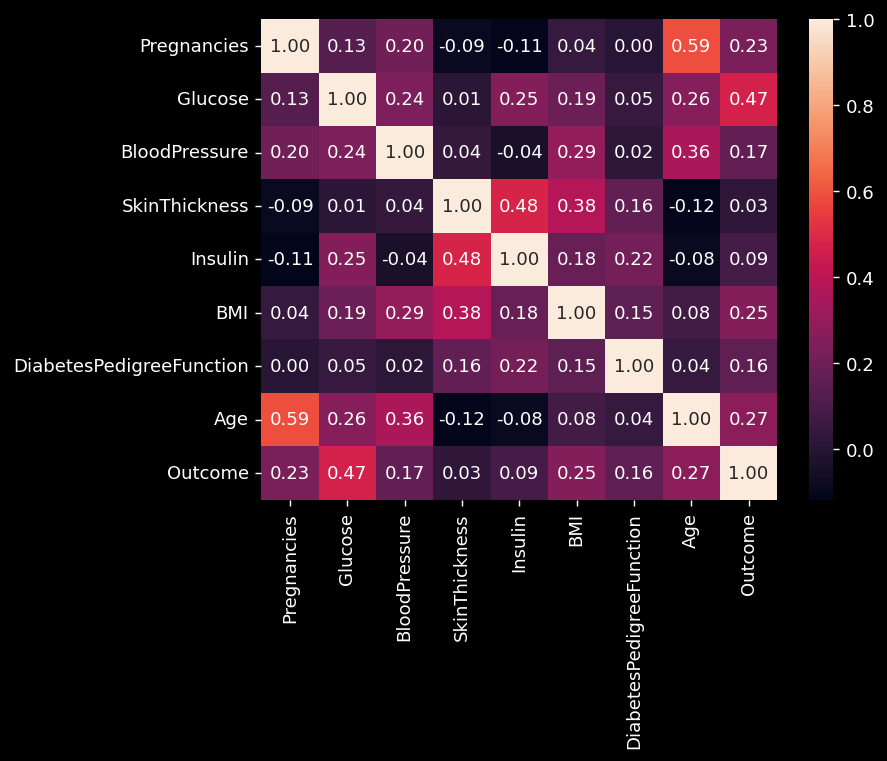

In [25]:
df = clean_data

correlation = df.corr()
plt.figure(dpi=130)
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.show()

In [26]:
correlation["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.471092
Age                         0.272897
BMI                         0.253816
Pregnancies                 0.228189
BloodPressure               0.168835
DiabetesPedigreeFunction    0.160773
Insulin                     0.087046
SkinThickness               0.026341
Name: Outcome, dtype: float64

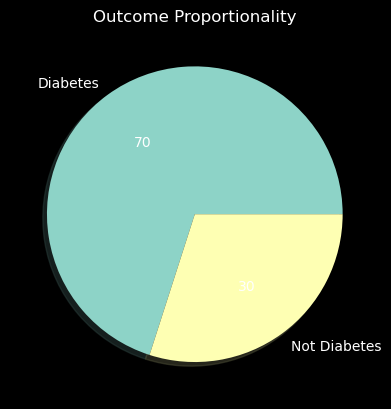

In [27]:
plt.pie(
    df.Outcome.value_counts(),
    labels=["Diabetes", "Not Diabetes"],
    autopct="%.f",
    shadow=True,
)
plt.title("Outcome Proportionality")
plt.show()

In [28]:
X = df.drop(columns=["Outcome"])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [29]:
Y = df.Outcome
Y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 621, dtype: int64

In [32]:
# Normalizaton
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler(feature_range=(0, 1)).fit_transform(X)[:5]

array([[0.46153846, 0.69333333, 0.5       , 0.58333333, 0.        ,
        0.49517685, 0.50091241, 0.6744186 ],
       [0.07692308, 0.27333333, 0.41176471, 0.48333333, 0.        ,
        0.27009646, 0.24908759, 0.23255814],
       [0.61538462, 0.92666667, 0.38235294, 0.        , 0.        ,
        0.16398714, 0.5419708 , 0.25581395],
       [0.07692308, 0.3       , 0.41176471, 0.38333333, 0.29559748,
        0.31832797, 0.08120438, 0.        ],
       [0.38461538, 0.48      , 0.52941176, 0.        , 0.        ,
        0.23794212, 0.11222628, 0.20930233]])

In [33]:
# Standardization
from sklearn.preprocessing import StandardScaler

StandardScaler().fit(X).transform(X)[:5]

array([[ 0.68023866,  1.08637979,  0.0044127 ,  0.94101085, -0.83710706,
         0.26462741,  0.81393448,  1.66201928],
       [-0.85251971, -1.17054653, -0.52596592,  0.54634556, -0.83710706,
        -0.83849433, -0.30442367, -0.12462116],
       [ 1.29334201,  2.34022775, -0.70275879, -1.36120334, -0.83710706,
        -1.35853744,  0.99627548, -0.03058745],
       [-0.85251971, -1.02724962, -0.52596592,  0.15168027,  0.36036611,
        -0.6021111 , -1.04999577, -1.06495824],
       [ 0.37368698, -0.05999549,  0.18120558, -1.36120334, -0.83710706,
        -0.99608316, -0.91222701, -0.21865487]])